In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from os import path
from datetime import date
import math

IPython_default = plt.rcParams.copy()
print(mpl.style.available)
def set_default():
    plt.rcParams.update(IPython_default);


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
# mpl.style.use('seaborn-whitegrid')
mpl.style.reload_library()
mpl.style.use('ggplot')
# mpl.style.use('ggplot')

# US COVID-19 OWID data visualizations

In [3]:
refresh = False
path_ob = './%s'%('covid-testing-all-observations.csv')
path_test = './%s'% ('owid-covid-data.csv')
if not path.exists(path_ob) or refresh:
    !rm -f ./covid-testing-all-observations.csv
    !wget  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv

if not path.exists(path_test) or refresh:
    !rm -f ./owid-covid-data.csv
    !wget https://covid.ourworldindata.org/data/owid-covid-data.csv


In [4]:
url_ob = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv'
url_test = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
testing = pd.read_csv(url_test, parse_dates=['date'],infer_datetime_format=True)
obs = pd.read_csv(url_ob)
# display(testing.groupby('location').get_group('India'))

Text(0.5, 1.0, 'US covid progression - OWID data - new')

<Figure size 1440x1080 with 0 Axes>

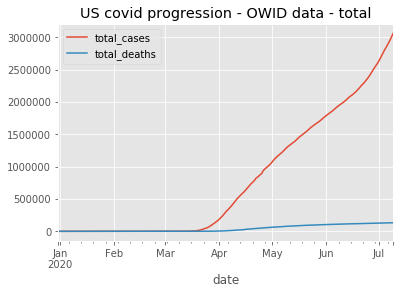

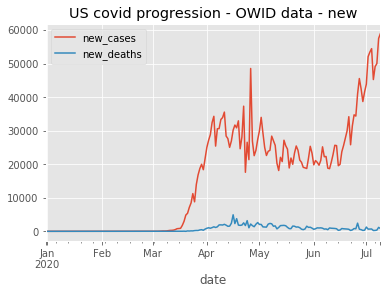

In [5]:
a = testing.groupby('location').get_group('United States')
fig = plt.figure(figsize=(20,15))
cols = np.array(['total_cases', 'total_deaths'])
cols_new = np.array(['new_cases', 'new_deaths'])
ax = a.plot(x='date', y=cols)
ax.set_title('US covid progression - OWID data - total')
plt.gca()
ax1 = a.plot(x='date', y=cols_new)
ax1.set_title('US covid progression - OWID data - new')
# display(a)

Text(0.5, 1.0, 'India covid progression - OWID data - new')

<Figure size 1440x1080 with 0 Axes>

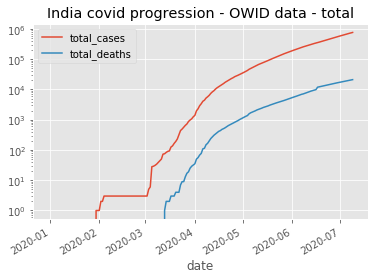

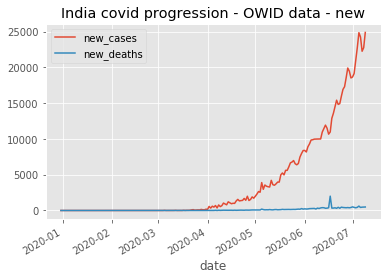

In [6]:
country = 'India'
a = testing.groupby('location').get_group(country)
fig = plt.figure(figsize=(20,15))
cols = np.array(['total_cases', 'total_deaths'])
cols_new = np.array(['new_cases', 'new_deaths'])
ax = a.plot(x='date', y=cols)
ax.set_title(country + ' covid progression - OWID data - total')
plt.yscale('log')
plt.gca()
ax1 = a.plot(x='date', y=cols_new)
ax1.set_title(country + ' covid progression - OWID data - new')

# NYTimes database 


In [7]:
def convert_col(df, col, datatype):
    df[col] = df[col].astype(datatype)
    pass

def get_state_cd(df_state, state):
    return df_state.loc[state,['cases','deaths']]

In [8]:
usa = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv', parse_dates=['date'], index_col='date',infer_datetime_format=True)
usa_state = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates=['date'],index_col=['state','date'], infer_datetime_format=True)
usa_c = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', parse_dates=['date'], infer_datetime_format=True)
# convert_col(usa, 'date', 'datetime64[ns]')
# convert_col(usa_state, 'date', 'datetime64[ns]')
# convert_col(usa_c, 'date', 'datetime64[ns]')

# usa_state['date'] =usa_state['date'].astype('datetime64[ns]')
# usa_state['date'] =usa_state['date'].astype('datetime64[ns]')
# usa_state['date'] =usa_state['date'].astype('datetime64[ns]')
# print('US')
# usa.info()
# print('US State-wise')
usa_state.info()
# print('US County-wise')
# usa_c.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7109 entries, ('Washington', Timestamp('2020-01-21 00:00:00')) to ('Wyoming', Timestamp('2020-07-09 00:00:00'))
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   fips    7109 non-null   int64
 1   cases   7109 non-null   int64
 2   deaths  7109 non-null   int64
dtypes: int64(3)
memory usage: 189.3+ KB


In [9]:
def show_state(usa_state=usa_state, usa = usa, st = 'New York', cols = ['cases','deaths'], last=30, ax=None):
    state = usa_state.loc[st,cols]
    # display(cali)
    # cali[usa.index[0]] = 0
    # cali.loc[usa.index[0], :] = [cali['fips'][0], 0, 0]
    state = state.reindex(usa.index, method='ffill').fillna(0)
    usa_cd = usa[['cases', 'deaths']]
    delta = (state / (usa_cd - state)) *100
    delta.iloc[-last:, :].plot(ax=ax, title='%s Data'% st)
    ax.set_ylabel("Percentage of total in US")
    pass

def show_all(usa_state=usa_state, usa = usa, st = 'New York', cols = ['cases','deaths'], last=30, ax=None):
    state = usa_state.loc[st,cols]
    # display(cali)
    # cali[usa.index[0]] = 0
    # cali.loc[usa.index[0], :] = [cali['fips'][0], 0, 0]
    state = state.reindex(usa.index, method='ffill').fillna(0)
    usa_cd = usa[['cases', 'deaths']]
    delta = (state / (usa_cd - state)) *100
    ax = usa_cd.iloc[-last:, :].plot(title='%s Data'% 'USA', figsize=(12,8))
    ax.set_ylabel("Total values")
    plt.yscale('log')
    plt.show()
    pass

# def show_state_abs(usa_state=usa_state, usa = usa, st = 'New York', cols = ['cases','deaths'], last=30):
#     state = usa_state.loc[st,cols]
#     # display(cali)
#     # cali[usa.index[0]] = 0
#     # cali.loc[usa.index[0], :] = [cali['fips'][0], 0, 0]
#     state = state.reindex(usa.index, method='ffill').fillna(0)
#     usa_cd = usa[['cases', 'deaths']]
#     delta = (state / (usa_cd - state))* 100
#     ax = state.iloc[-last:, :].plot()
#     plt.title('%s Data'% st)
#     plt.show()

def show_state_abs(usa_state=usa_state, usa = usa, st = 'New York', cols = ['cases','deaths'], last=30, ax=None):
    state = usa_state.loc[st,cols]
    state = state.reindex(usa.index, method='ffill').fillna(0)
    usa_cd = usa[['cases', 'deaths']]
#     delta = (state / (usa_cd - state)) *100
    state.iloc[-last:, :].plot(ax=ax, title='%s Data'% st)
    ax.set_ylabel("Percentage of total in US")
    ax.set_yscale('log')
    pass

## New York Data

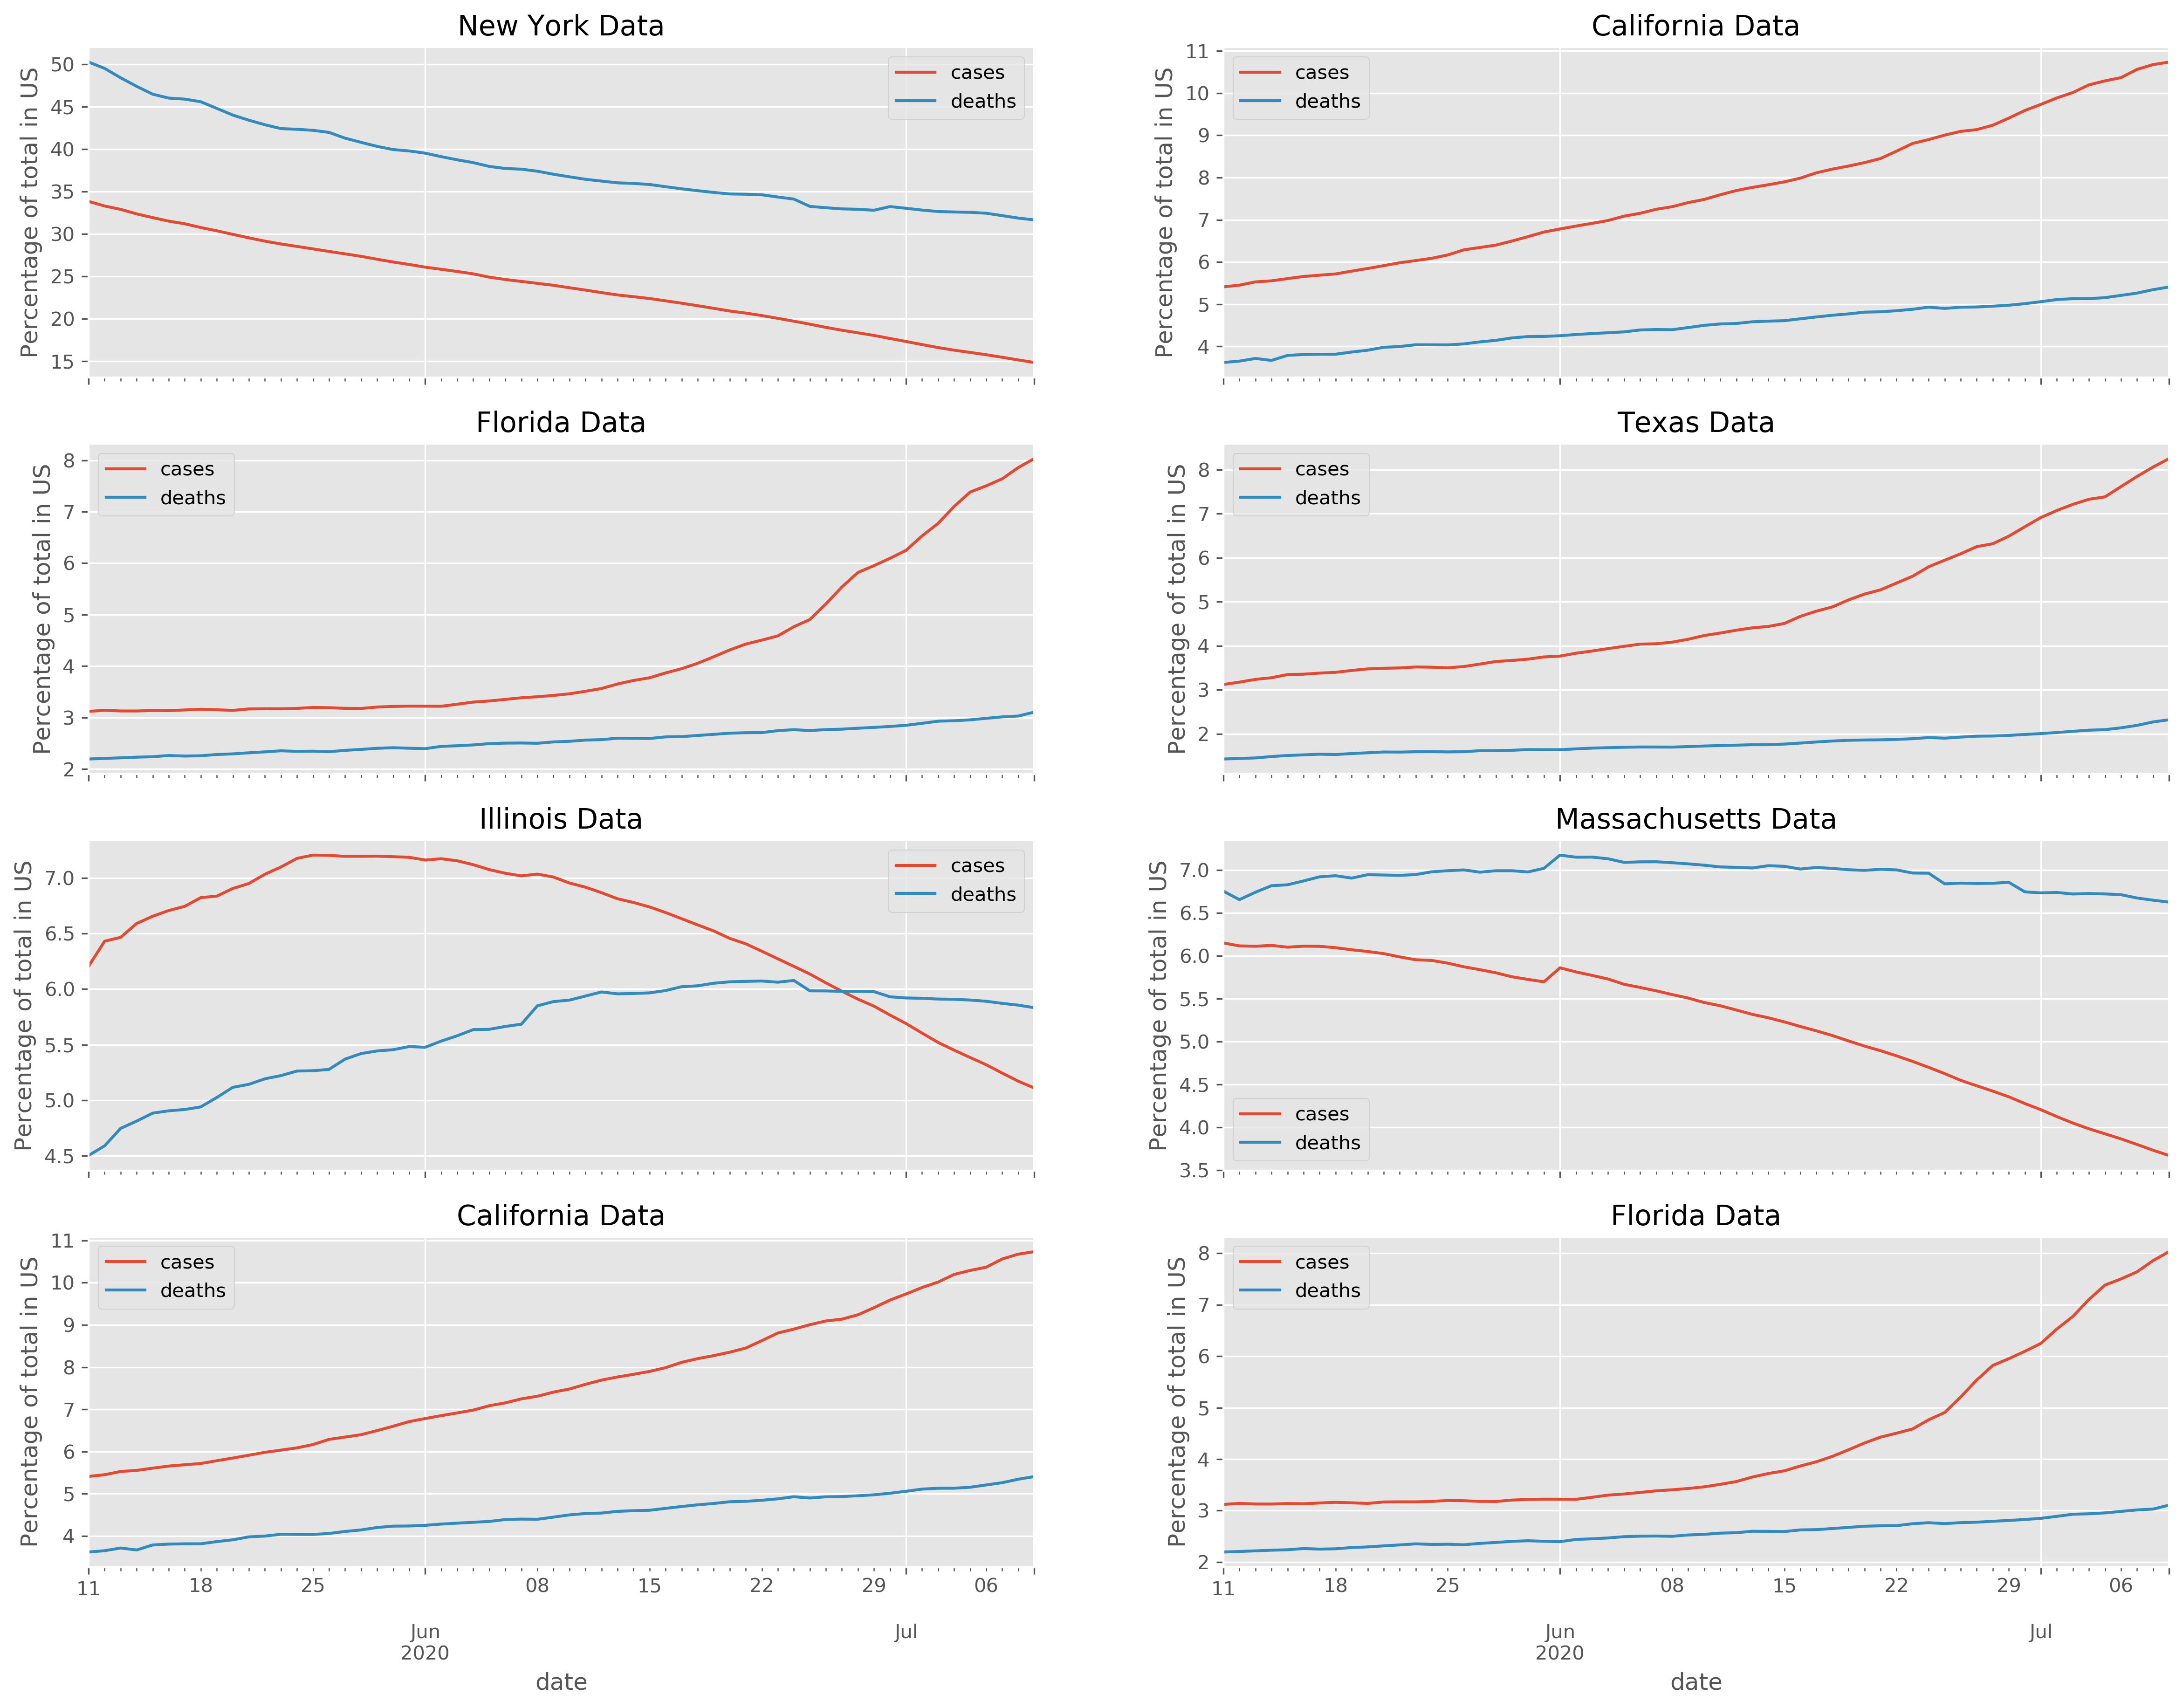

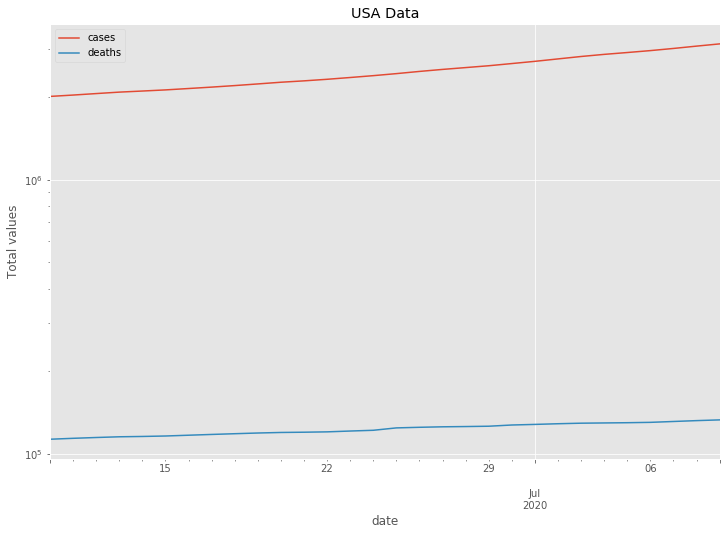

In [10]:
# cali = usa_state.loc['New York',['cases','deaths']]
# # display(cali)
# # cali[usa.index[0]] = 0
# # cali.loc[usa.index[0], :] = [cali['fips'][0], 0, 0]
# cali = cali.reindex(usa.index, method='ffill').fillna(0)
# usa_cd = usa[['cases', 'deaths']]
# delta = (cali / (usa_cd - cali))
# ax = delta.iloc[-30:, :].plot()
# plt.title('New York Data')
# plt.show()
# plt.yscale('log')
# usa[['cases', 'deaths']].plot()
# plt.yscale('log')
# plt.gca()
# display(cali)
states = ['New York', 'California', 'Florida', 'Texas', 'Illinois', 'Massachusetts', 'California', 'Florida']
last = 60
# plt.figure()
fig, axs = plt.subplots(math.ceil(len(states)/2), 2, figsize=(6.4*3, 4.8*3), sharex=True, dpi=300)
for i in range(len(states)):
#     plt.subplot(math.ceil(len(states)/2), 2, i+1)
    show_state(st=states[i], last=last, ax = axs.flatten()[i])
plt.show()

show_all()

In [11]:
def preprocess_mob(df_m):
    values = {'retail_and_recreation_percent_change_from_baseline':0.0,
         'grocery_and_pharmacy_percent_change_from_baseline':0.0,
         'parks_percent_change_from_baseline':0.0,
         'transit_stations_percent_change_from_baseline':0.0,
         'workplaces_percent_change_from_baseline':0.0,
         'residential_percent_change_from_baseline':0.0,
         'country_region_code': 'NA'}
    df_m.fillna(values, inplace=True)
    

In [12]:
mob_url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
mobility = pd.read_csv(mob_url,parse_dates=['date'], infer_datetime_format=True,dtype={'country_region_code':'string'})
preprocess_mob(mobility)
display(mobility.info())


/Users/abdulhannan/anaconda3/envs/cs689/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641621 entries, 0 to 641620
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 641621 non-null  string        
 1   country_region                                      641621 non-null  object        
 2   sub_region_1                                        622595 non-null  object        
 3   sub_region_2                                        370478 non-null  object        
 4   iso_3166_2_code                                     233148 non-null  object        
 5   census_fips_code                                    370620 non-null  float64       
 6   date                                                641621 non-null  datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  641621 non-null  float64       

None

In [13]:
usa_m_s = mobility.groupby('country_region').get_group('United States')[mobility['sub_region_1'].notna()][mobility['sub_region_2'].isna()]

/Users/abdulhannan/anaconda3/envs/cs689/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [14]:
df_usa_s = usa_m_s.drop(columns=['sub_region_2', 'country_region', 'country_region_code', 'iso_3166_2_code']).rename(
    {'sub_region_1':'state', 'country_region_code':'iso_code'}, axis=1).set_index(['state', 'date']).reindex(
    usa_state.index).fillna(0.0)
merged = pd.merge(usa_state, df_usa_s, how='outer', sort=True, left_index=True, right_index=True).drop(columns='fips')
display(merged.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7109 entries, ('Alabama', Timestamp('2020-03-13 00:00:00')) to ('Wyoming', Timestamp('2020-07-09 00:00:00'))
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   cases                                               7109 non-null   int64  
 1   deaths                                              7109 non-null   int64  
 2   census_fips_code                                    7109 non-null   float64
 3   retail_and_recreation_percent_change_from_baseline  7109 non-null   float64
 4   grocery_and_pharmacy_percent_change_from_baseline   7109 non-null   float64
 5   parks_percent_change_from_baseline                  7109 non-null   float64
 6   transit_stations_percent_change_from_baseline       7109 non-null   float64
 7   workplaces_percent_change_from_baseline             7109 non-null   float64

None

In [15]:
merged

cases  deaths  census_fips_code  \
state   date                                          
Alabama 2020-03-13      6       0               0.0   
        2020-03-14     12       0               0.0   
        2020-03-15     23       0               0.0   
        2020-03-16     29       0               0.0   
        2020-03-17     39       0               0.0   
...                   ...     ...               ...   
Wyoming 2020-07-05   1634      20               0.0   
        2020-07-06   1675      20               0.0   
        2020-07-07   1711      21               0.0   
        2020-07-08   1740      21               0.0   
        2020-07-09   1774      21               0.0   

                    retail_and_recreation_percent_change_from_baseline  \
state   date                                                             
Alabama 2020-03-13                                                7.0    
        2020-03-14                                                1.0    
        2020-03-15                                               -7.0    
        2020-03-16                                               -2.0    
        2020-03-17                                              -11.0    
...                                                               ...    
Wyoming 2020-07-05                                               12.0    
        2020-07-06                                                0.0    
        2020-07-07                                                0.0    
        2020-07-08                                                0.0    
        2020-07-09                                                0.0    

                    grocery_and_pharmacy_percent_change_from_baseline  \
state   date                                                            
Alabama 2020-03-13                                               32.0   
        2020-03-14                                               28.0   
        2020-03-15                                               16.0   
        2020-03-16                                               24.0   
        2020-03-17                                               17.0   
...                                                               ...   
Wyoming 2020-07-05                                               33.0   
        2020-07-06                                                0.0   
        2020-07-07                                                0.0   
        2020-07-08                                                0.0   
        2020-07-09                                                0.0   

                    parks_percent_change_from_baseline  \
state   date                                             
Alabama 2020-03-13                                26.0   
        2020-03-14                                55.0   
        2020-03-15                                16.0   
        2020-03-16                                22.0   
        2020-03-17                                25.0   
...                                                ...   
Wyoming 2020-07-05                               320.0   
        2020-07-06                                 0.0   
        2020-07-07                                 0.0   
        2020-07-08                                 0.0   
        2020-07-09                                 0.0   

                    transit_stations_percent_change_from_baseline  \
state   date                                                        
Alabama 2020-03-13                                            7.0   
        2020-03-14                                           12.0   
        2020-03-15                                            6.0   
        2020-03-16                                            2.0   
        2020-03-17                                           -1.0   
...                                                           ...   
Wyoming 2020-07-05                                           42.0   
        2020-07

# T-SNE visualization

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import NullFormatter
from sklearn import manifold, preprocessing
from sklearn.pipeline import make_pipeline
from time import time

In [17]:
display(merged)
X = preprocessing.scale(merged)
X_emb = manifold.TSNE(n_components=2, verbose=1, perplexity=60, n_iter=500).fit_transform(X)

cases  deaths  census_fips_code  \
state   date                                          
Alabama 2020-03-13      6       0               0.0   
        2020-03-14     12       0               0.0   
        2020-03-15     23       0               0.0   
        2020-03-16     29       0               0.0   
        2020-03-17     39       0               0.0   
...                   ...     ...               ...   
Wyoming 2020-07-05   1634      20               0.0   
        2020-07-06   1675      20               0.0   
        2020-07-07   1711      21               0.0   
        2020-07-08   1740      21               0.0   
        2020-07-09   1774      21               0.0   

                    retail_and_recreation_percent_change_from_baseline  \
state   date                                                             
Alabama 2020-03-13                                                7.0    
        2020-03-14                                                1.0    
        2020-03-15                                               -7.0    
        2020-03-16                                               -2.0    
        2020-03-17                                              -11.0    
...                                                               ...    
Wyoming 2020-07-05                                               12.0    
        2020-07-06                                                0.0    
        2020-07-07                                                0.0    
        2020-07-08                                                0.0    
        2020-07-09                                                0.0    

                    grocery_and_pharmacy_percent_change_from_baseline  \
state   date                                                            
Alabama 2020-03-13                                               32.0   
        2020-03-14                                               28.0   
        2020-03-15                                               16.0   
        2020-03-16                                               24.0   
        2020-03-17                                               17.0   
...                                                               ...   
Wyoming 2020-07-05                                               33.0   
        2020-07-06                                                0.0   
        2020-07-07                                                0.0   
        2020-07-08                                                0.0   
        2020-07-09                                                0.0   

                    parks_percent_change_from_baseline  \
state   date                                             
Alabama 2020-03-13                                26.0   
        2020-03-14                                55.0   
        2020-03-15                                16.0   
        2020-03-16                                22.0   
        2020-03-17                                25.0   
...                                                ...   
Wyoming 2020-07-05                               320.0   
        2020-07-06                                 0.0   
        2020-07-07                                 0.0   
        2020-07-08                                 0.0   
        2020-07-09                                 0.0   

                    transit_stations_percent_change_from_baseline  \
state   date                                                        
Alabama 2020-03-13                                            7.0   
        2020-03-14                                           12.0   
        2020-03-15                                            6.0   
        2020-03-16                                            2.0   
        2020-03-17                                           -1.0   
...                                                           ...   
Wyoming 2020-07-05                                           42.0   
        2020-07

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 7109 samples in 0.009s...
[t-SNE] Computed neighbors for 7109 samples in 0.555s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7109
[t-SNE] Computed conditional probabilities for sample 2000 / 7109
[t-SNE] Computed conditional probabilities for sample 3000 / 7109
[t-SNE] Computed conditional probabilities for sample 4000 / 7109
[t-SNE] Computed conditional probabilities for sample 5000 / 7109
[t-SNE] Computed conditional probabilities for sample 6000 / 7109
[t-SNE] Computed conditional probabilities for sample 7000 / 7109
[t-SNE] Computed conditional probabilities for sample 7109 / 7109
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.556648
[t-SNE] KL divergence after 500 iterations: 1.078704


array([ 0,  0,  0, ..., 54, 54, 54])

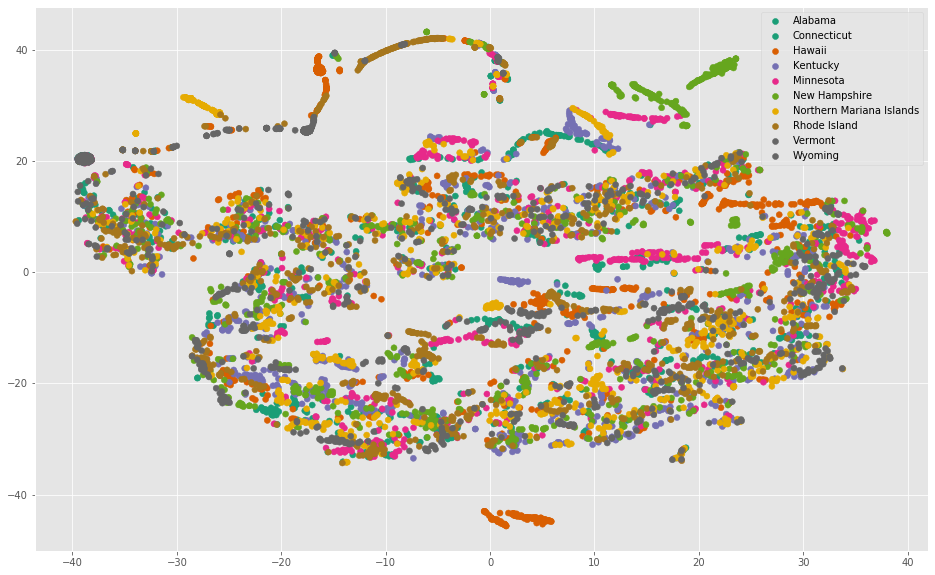

In [18]:
le = preprocessing.LabelEncoder()
# le = preprocessing.OrdinalEncoder()
cma = le.fit_transform(list(map(lambda x: x[0], np.array(merged.index))))
display(cma)
plt.figure(figsize=(16,10))
sne_sc = plt.scatter(x = X_emb[:,0], y=X_emb[:,1], c = cma, cmap='Dark2')
def l(x,y):
    return le.inverse_transform(np.array([x.astype(int)]))[0]
plt.legend(*sne_sc.legend_elements(fmt=mpl.ticker.FuncFormatter(l)))

# PCA

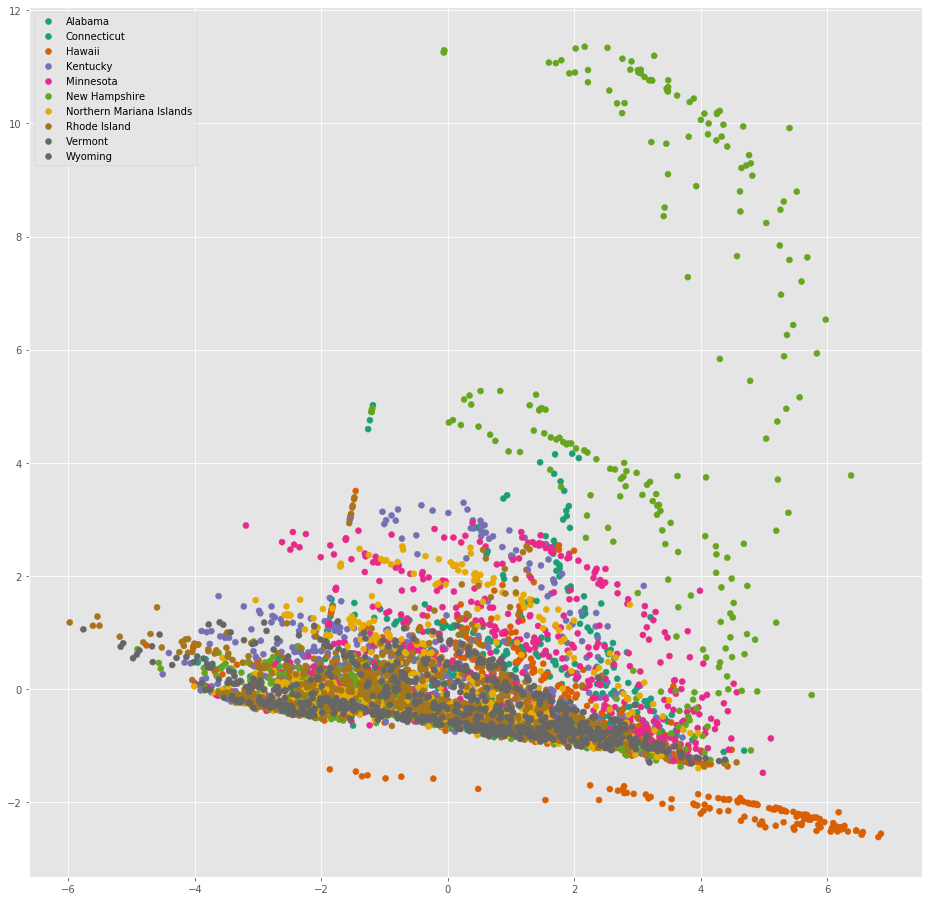

In [19]:
from sklearn.decomposition import TruncatedSVD, PCA
svd = make_pipeline(
                    TruncatedSVD(n_components=2, n_iter=500, random_state=42))
X_s = svd.fit_transform(X)
le = preprocessing.LabelEncoder()
cma = le.fit_transform(list(map(lambda x: x[0], np.array(merged.index))))
plt.figure(figsize=(16,16))
sc = plt.scatter(x = X_s[:,0], y=X_s[:,1], c = cma, cmap='Dark2')
def l(x,y):
    return le.inverse_transform(np.array([x.astype(int)]))[0]
plt.legend(*sc.legend_elements(fmt=mpl.ticker.FuncFormatter(l)))

# Country wise visualization

In [20]:
mobility

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641616,ZW,Zimbabwe,Midlands Province,NaN,ZW-MI,NaN,2020-07-01,0.0,0.0,0.0,0.0,-4.0,0.0
641617,ZW,Zimbabwe,Midlands Province,NaN,ZW-MI,NaN,2020-07-02,0.0,0.0,0.0,0.0,-5.0,0.0
641618,ZW,Zimbabwe,Midlands Province,NaN,ZW-MI,NaN,2020-07-03,0.0,0.0,0.0,0.0,2.0,0.0
641619,ZW,Zimbabwe,Midlands Province,NaN,ZW-MI,NaN,2020-07-04,0.0,0.0,0.0,0.0,21.0,0.0


In [21]:
mob_cty = mobility[mobility['sub_region_1'].isna()][mobility['sub_region_2'].isna()].drop(
    columns=['sub_region_1', 'sub_region_2', 'country_region_code']).set_index(['country_region', 'date'])

testing_cty = testing[testing['location']!='International'][testing['location']!='World'].drop(columns='iso_code').rename({'location':'country_region'}, axis=1).set_index(['country_region', 'date'])
mob_cty = mob_cty.reindex(testing_cty.index)
# display(testing_cty['iso_code'].nunique(), mobility['country_region_code'].nunique())

display(testing_cty)
# pd.set_option("display.max_rows", 999)
display(mob_cty)
# pd.reset_option("display.max_rows")

/Users/abdulhannan/anaconda3/envs/cs689/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/abdulhannan/anaconda3/envs/cs689/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


continent  total_cases  new_cases  total_deaths  \
country_region date                                                         
Afghanistan    2019-12-31      Asia          0.0        0.0           0.0   
               2020-01-01      Asia          0.0        0.0           0.0   
               2020-01-02      Asia          0.0        0.0           0.0   
               2020-01-03      Asia          0.0        0.0           0.0   
               2020-01-04      Asia          0.0        0.0           0.0   
...                             ...          ...        ...           ...   
Zimbabwe       2020-07-05    Africa        698.0       73.0           8.0   
               2020-07-06    Africa        716.0       18.0           8.0   
               2020-07-07    Africa        734.0       18.0           9.0   
               2020-07-08    Africa        787.0       53.0           9.0   
               2020-07-09    Africa        885.0       98.0           9.0   

                           new_deaths  total_cases_per_million  \
country_region date                                              
Afghanistan    2019-12-31         0.0                    0.000   
               2020-01-01         0.0                    0.000   
               2020-01-02         0.0                    0.000   
               2020-01-03         0.0                    0.000   
               2020-01-04         0.0                    0.000   
...                               ...                      ...   
Zimbabwe       2020-07-05         1.0                   46.962   
               2020-07-06         0.0                   48.174   
               2020-07-07         1.0                   49.385   
               2020-07-08         0.0                   52.951   
               2020-07-09         0.0                   59.544   

                           new_cases_per_million  total_deaths_per_million  \
country_region date                                                          
Afghanistan    2019-12-31                  0.000                     0.000   
               2020-01-01                  0.000                     0.000   
               2020-01-02                  0.000                     0.000   
               2020-01-03                  0.000                     0.000   
               2020-01-04                  0.000                     0.000   
...                                          ...                       ...   
Zimbabwe       2020-07-05                  4.912                     0.538   
               2020-07-06                  1.211                     0.538   
               2020-07-07                  1.211                     0.606   
               2020-07-08                  3.566                     0.606   
               2020-07-09                  6.594                     0.606   

                           new_deaths_per_million  total_tests  ...  \
country_region date                                             ...   
Afghanistan    2019-12-31                   0.000          NaN  ...   
               2020-01-01                   0.000          NaN  ...   
               2020-01-02                   0.000          NaN  ...   
               2020-01-03                   0.000          NaN  ...   
               2020-01-04                   0.000          NaN  ...   
...                                           ...          ...  ...   
Zimbabwe       2020-07-05                   0.067      33256.0  ...   
               2020-07-06                   0.000      33568.0  ...   
               2020-07-07                   0.067      34160.0  ...   
               2020-07-08                   0.000      34766.0  ...   
               2020-07-09                   0.000          NaN  ...   

                           aged_70_older  gdp_per_capita  extreme_poverty  \
country_region date                                                         
Afghanistan    2019-12-31          1.337        1803.987              Na

iso_3166_2_code  census_fips_code  \
country_region date                                           
Afghanistan    2019-12-31             NaN               NaN   
               2020-01-01             NaN               NaN   
               2020-01-02             NaN               NaN   
               2020-01-03             NaN               NaN   
               2020-01-04             NaN               NaN   
...                                   ...               ...   
Zimbabwe       2020-07-05             NaN               NaN   
               2020-07-06             NaN               NaN   
               2020-07-07             NaN               NaN   
               2020-07-08             NaN               NaN   
               2020-07-09             NaN               NaN   

                           retail_and_recreation_percent_change_from_baseline  \
country_region date                                                             
Afghanistan    2019-12-31                                                NaN    
               2020-01-01                                                NaN    
               2020-01-02                                                NaN    
               2020-01-03                                                NaN    
               2020-01-04                                                NaN    
...                                                                      ...    
Zimbabwe       2020-07-05                                              -13.0    
               2020-07-06                                                NaN    
               2020-07-07                                                NaN    
               2020-07-08                                                NaN    
               2020-07-09                                                NaN    

                           grocery_and_pharmacy_percent_change_from_baseline  \
country_region date                                                            
Afghanistan    2019-12-31                                                NaN   
               2020-01-01                                                NaN   
               2020-01-02                                                NaN   
               2020-01-03                                                NaN   
               2020-01-04                                                NaN   
...                                                                      ...   
Zimbabwe       2020-07-05                                               -1.0   
               2020-07-06                                                NaN   
               2020-07-07                                                NaN   
               2020-07-08                                                NaN   
               2020-07-09                                                NaN   

                           parks_percent_change_from_baseline  \
country_region date                                             
Afghanistan    2019-12-31                                 NaN   
               2020-01-01                                 NaN   
               2020-01-02                                 NaN   
               2020-01-03                                 NaN   
               2020-01-04                                 NaN   
...                                                       ...   
Zimbabwe       2020-07-05                                 3.0   
               2020-07-06                                 NaN   
               2020-07-07                                 NaN   
               2020-07-08                                 NaN   
               2020-07-09                                 NaN   

                           transit_stations_percent_change_from_baseline  \
country_region date                                                        
Afghanistan    2019-12-31                                            NaN   
               2020-01-01            

In [22]:
merged_cty = pd.merge(mob_cty, testing_cty, how='outer', sort=True, left_index=True, right_index=True).drop(columns=['tests_units'])
merged_cty

iso_3166_2_code  census_fips_code  \
country_region date                                           
Afghanistan    2019-12-31             NaN               NaN   
               2020-01-01             NaN               NaN   
               2020-01-02             NaN               NaN   
               2020-01-03             NaN               NaN   
               2020-01-04             NaN               NaN   
...                                   ...               ...   
Zimbabwe       2020-07-05             NaN               NaN   
               2020-07-06             NaN               NaN   
               2020-07-07             NaN               NaN   
               2020-07-08             NaN               NaN   
               2020-07-09             NaN               NaN   

                           retail_and_recreation_percent_change_from_baseline  \
country_region date                                                             
Afghanistan    2019-12-31                                                NaN    
               2020-01-01                                                NaN    
               2020-01-02                                                NaN    
               2020-01-03                                                NaN    
               2020-01-04                                                NaN    
...                                                                      ...    
Zimbabwe       2020-07-05                                              -13.0    
               2020-07-06                                                NaN    
               2020-07-07                                                NaN    
               2020-07-08                                                NaN    
               2020-07-09                                                NaN    

                           grocery_and_pharmacy_percent_change_from_baseline  \
country_region date                                                            
Afghanistan    2019-12-31                                                NaN   
               2020-01-01                                                NaN   
               2020-01-02                                                NaN   
               2020-01-03                                                NaN   
               2020-01-04                                                NaN   
...                                                                      ...   
Zimbabwe       2020-07-05                                               -1.0   
               2020-07-06                                                NaN   
               2020-07-07                                                NaN   
               2020-07-08                                                NaN   
               2020-07-09                                                NaN   

                           parks_percent_change_from_baseline  \
country_region date                                             
Afghanistan    2019-12-31                                 NaN   
               2020-01-01                                 NaN   
               2020-01-02                                 NaN   
               2020-01-03                                 NaN   
               2020-01-04                                 NaN   
...                                                       ...   
Zimbabwe       2020-07-05                                 3.0   
               2020-07-06                                 NaN   
               2020-07-07                                 NaN   
               2020-07-08                                 NaN   
               2020-07-09                                 NaN   

                           transit_stations_percent_change_from_baseline  \
country_region date                                                        
Afghanistan    2019-12-31                                            NaN   
               2020-01-01            

In [23]:
merged_cty.to_csv('merged_mob_owid.csv')
display(merged_cty.loc['United States'])

,iso_3166_2_code,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,continent,total_cases,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-05,NaN,NaN,-22.0,-10.0,53.0,-23.0,-19.0,3.0,North America,2839542.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,2888635.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,2938625.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86


In [24]:
from sklearn.decomposition import TruncatedSVD, PCA
X_c = preprocessing.scale(merged_cty.fillna(0.0))
print(X_c.shape)
svd = make_pipeline(
                    TruncatedSVD(n_components=2, n_iter=500, random_state=42))
X_s_c = svd.fit_transform(X_c)
le = preprocessing.LabelEncoder()
cma = le.fit_transform(list(map(lambda x: x[0], np.array(merged_cty.index))))
plt.figure(figsize=(16,16))
sc_c = plt.scatter(x = X_s_c[:,0], y=X_s_c[:,1], c = cma, cmap='Dark2')
def l(x,y):
    return le.inverse_transform(np.array([x.astype(int)]))[0]
plt.legend(*sc_c.legend_elements(fmt=mpl.ticker.FuncFormatter(l)))

ValueError: could not convert string to float: 'Asia'